In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestClassifier
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.api import Logit
#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# 선형회귀분석 (절편 추가)
import statsmodels.api as sm

#분류 모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/total.CSV",encoding='euc-kr')
df

,No_Die,Lot_Num,Wafer_Num,Datetime,Ox_Chamber,type,Temp_OXid,ppm,Pressure,Oxid_time,...,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target
0,NOLSM325131325,13,28,01-03-2019,2,dry,1214.307948,26.69,0.203,120,...,1.500000e+16,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141
1,NOLSM326132326,13,29,01-03-2019,2,dry,978.110792,30.86,0.217,137,...,1.110000e+16,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55
2,NOLSM327133327,13,30,01-03-2019,2,dry,1176.019149,31.07,0.218,116,...,1.040000e+16,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96
3,NOLSM328134328,13,31,01-03-2019,2,dry,933.442733,31.04,0.196,143,...,8.890000e+15,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105
4,NOLSM329135329,13,32,01-03-2019,2,wet,1140.598752,31.37,0.215,76,...,1.670000e+16,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2019,3,wet,1275.182502,45.10,0.214,21,...,1.050000e+16,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78
1700,NOLSM8493212,32,12,28-02-2019,1,wet,1268.105427,45.07,0.215,22,...,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,42
1701,NOLSM8503213,32,13,28-02-2019,1,wet,1279.160563,45.12,0.214,21,...,9.320000e+15,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,42
1702,NOLSM8513214,32,14,28-02-2019,1,wet,1272.804948,45.34,0.213,20,...,1.180000e+16,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,24


In [93]:
df.drop(['No_Die','Datetime','Target','Lot_Num','Wafer_Num'], axis = 1, inplace = True)

In [94]:
df

,Ox_Chamber,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,photo_soft_Chamber,resist_target,N2_HMDS,...,Chamber_Num,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp
0,2,dry,1214.307948,26.69,0.203,120,713.132,1,1.46994,17.367,...,1,1.500000e+16,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154
1,2,dry,978.110792,30.86,0.217,137,714.295,1,0.86579,16.090,...,2,1.110000e+16,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156
2,2,dry,1176.019149,31.07,0.218,116,710.114,1,0.90483,19.026,...,3,1.040000e+16,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152
3,2,dry,933.442733,31.04,0.196,143,710.617,1,0.42197,18.891,...,1,8.890000e+15,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155
4,2,wet,1140.598752,31.37,0.215,76,711.632,1,1.70139,13.788,...,2,1.670000e+16,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,3,wet,1275.182502,45.10,0.214,21,715.498,3,0.89644,16.029,...,3,1.050000e+16,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152
1700,1,wet,1268.105427,45.07,0.215,22,707.179,1,1.02384,17.587,...,3,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152
1701,1,wet,1279.160563,45.12,0.214,21,712.946,1,1.02634,16.445,...,2,9.320000e+15,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152
1702,1,wet,1272.804948,45.34,0.213,20,711.987,1,0.56833,15.306,...,1,1.180000e+16,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152


In [95]:
df.drop(['Ox_Chamber','lithography_Chamber','Chamber_Num'], axis = 1, inplace = True)

In [96]:
df

,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,photo_soft_Chamber,resist_target,N2_HMDS,pressure_HMDS,...,Selectivity,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp
0,dry,1214.307948,26.69,0.203,120,713.132,1,1.46994,17.367,15.006,...,1.030,1.500000e+16,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154
1,dry,978.110792,30.86,0.217,137,714.295,1,0.86579,16.090,15.059,...,1.038,1.110000e+16,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156
2,dry,1176.019149,31.07,0.218,116,710.114,1,0.90483,19.026,14.930,...,1.005,1.040000e+16,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152
3,dry,933.442733,31.04,0.196,143,710.617,1,0.42197,18.891,14.947,...,1.025,8.890000e+15,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155
4,wet,1140.598752,31.37,0.215,76,711.632,1,1.70139,13.788,14.820,...,1.038,1.670000e+16,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,21,715.498,3,0.89644,16.029,15.005,...,1.015,1.050000e+16,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152
1700,wet,1268.105427,45.07,0.215,22,707.179,1,1.02384,17.587,14.949,...,1.011,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152
1701,wet,1279.160563,45.12,0.214,21,712.946,1,1.02634,16.445,14.978,...,1.015,9.320000e+15,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152
1702,wet,1272.804948,45.34,0.213,20,711.987,1,0.56833,15.306,15.050,...,1.014,1.180000e+16,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152


In [97]:
df['Etching_Chamber'] = df['Etching_Chamber'].astype('str')
df['photo_soft_Chamber'] = df['photo_soft_Chamber'].astype('str')

In [98]:
df

,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,photo_soft_Chamber,resist_target,N2_HMDS,pressure_HMDS,...,Selectivity,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp
0,dry,1214.307948,26.69,0.203,120,713.132,1,1.46994,17.367,15.006,...,1.030,1.500000e+16,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154
1,dry,978.110792,30.86,0.217,137,714.295,1,0.86579,16.090,15.059,...,1.038,1.110000e+16,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156
2,dry,1176.019149,31.07,0.218,116,710.114,1,0.90483,19.026,14.930,...,1.005,1.040000e+16,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152
3,dry,933.442733,31.04,0.196,143,710.617,1,0.42197,18.891,14.947,...,1.025,8.890000e+15,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155
4,wet,1140.598752,31.37,0.215,76,711.632,1,1.70139,13.788,14.820,...,1.038,1.670000e+16,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,21,715.498,3,0.89644,16.029,15.005,...,1.015,1.050000e+16,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152
1700,wet,1268.105427,45.07,0.215,22,707.179,1,1.02384,17.587,14.949,...,1.011,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152
1701,wet,1279.160563,45.12,0.214,21,712.946,1,1.02634,16.445,14.978,...,1.015,9.320000e+15,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152
1702,wet,1272.804948,45.34,0.213,20,711.987,1,0.56833,15.306,15.050,...,1.014,1.180000e+16,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152


In [99]:
target = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/target양불 빡셈.CSV",encoding='euc-kr')
target

,Unnamed: 0,Target
0,0,bad
1,1,good
2,2,good
3,3,good
4,4,good
...,...,...
1699,1699,good
1700,1700,good
1701,1701,good
1702,1702,good


In [100]:
target=pd.DataFrame(target['Target'])
target

,Target
0,bad
1,good
2,good
3,good
4,good
...,...
1699,good
1700,good
1701,good
1702,good


In [101]:
df= pd.concat([df, target], axis = 1)
df

,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,photo_soft_Chamber,resist_target,N2_HMDS,pressure_HMDS,...,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target
0,dry,1214.307948,26.69,0.203,120,713.132,1,1.46994,17.367,15.006,...,1.500000e+16,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,bad
1,dry,978.110792,30.86,0.217,137,714.295,1,0.86579,16.090,15.059,...,1.110000e+16,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,good
2,dry,1176.019149,31.07,0.218,116,710.114,1,0.90483,19.026,14.930,...,1.040000e+16,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,good
3,dry,933.442733,31.04,0.196,143,710.617,1,0.42197,18.891,14.947,...,8.890000e+15,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,good
4,wet,1140.598752,31.37,0.215,76,711.632,1,1.70139,13.788,14.820,...,1.670000e+16,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,21,715.498,3,0.89644,16.029,15.005,...,1.050000e+16,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,good
1700,wet,1268.105427,45.07,0.215,22,707.179,1,1.02384,17.587,14.949,...,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,good
1701,wet,1279.160563,45.12,0.214,21,712.946,1,1.02634,16.445,14.978,...,9.320000e+15,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,good
1702,wet,1272.804948,45.34,0.213,20,711.987,1,0.56833,15.306,15.050,...,1.180000e+16,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,good


In [102]:
df['Target'] = np.where(df['Target'] == 'bad', 1, 0)
df

,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,photo_soft_Chamber,resist_target,N2_HMDS,pressure_HMDS,...,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target
0,dry,1214.307948,26.69,0.203,120,713.132,1,1.46994,17.367,15.006,...,1.500000e+16,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,1
1,dry,978.110792,30.86,0.217,137,714.295,1,0.86579,16.090,15.059,...,1.110000e+16,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,0
2,dry,1176.019149,31.07,0.218,116,710.114,1,0.90483,19.026,14.930,...,1.040000e+16,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,0
3,dry,933.442733,31.04,0.196,143,710.617,1,0.42197,18.891,14.947,...,8.890000e+15,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,0
4,wet,1140.598752,31.37,0.215,76,711.632,1,1.70139,13.788,14.820,...,1.670000e+16,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,21,715.498,3,0.89644,16.029,15.005,...,1.050000e+16,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,0
1700,wet,1268.105427,45.07,0.215,22,707.179,1,1.02384,17.587,14.949,...,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,0
1701,wet,1279.160563,45.12,0.214,21,712.946,1,1.02634,16.445,14.978,...,9.320000e+15,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,0
1702,wet,1272.804948,45.34,0.213,20,711.987,1,0.56833,15.306,15.050,...,1.180000e+16,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,0


# 로지스틱 회귀

In [21]:
df_train, df_test = train_test_split(df, test_size= 0.4, random_state=1234)
print('train data size : {}'.format(df_train.shape))
print('test data size : {}'.format(df_test.shape))

train data size : (1022, 43)
test data size : (682, 43)


In [35]:
log_model = Logit.from_formula("""Target ~ Lot_Num+ Wafer_Num + C(type) + Temp_OXid + ppm + Pressure + Oxid_time + thickness + 
C(photo_soft_Chamber) + resist_target + N2_HMDS + pressure_HMDS + temp_HMDS + temp_HMDS_bake + time_HMDS_bake + 
spin1 + spin2+ spin3 + photoresist_bake + temp_softbake + time_softbake + Line_CD + Wavelength +Resolution + Energy_Exposure +  
C(Etching_Chamber)+(Thin F4)+(Thin F3)+ (Thin F2) + (Thin F1)+ Temp_Etching +Source_Power +Selectivity + Flux60 + Flux90s + Flux160s + 
Flux480s + Flux840s + input_Energy + Temp_implantation + Furance_Temp + RTA_Temp""",df_train)
                               
log_result = log_model.fit()
print(log_result.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

# 의사결정나무

In [103]:
df_y = df['Target']
df_x = df.drop('Target', axis = 1, inplace = False)

In [104]:
df_x_dummy = pd.get_dummies(df_x)

In [105]:
df_x_dummy

,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,...,Furance_Temp,RTA_Temp,type_dry,type_wet,photo_soft_Chamber_1,photo_soft_Chamber_2,photo_soft_Chamber_3,Etching_Chamber_1,Etching_Chamber_2,Etching_Chamber_3
0,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,20.001,200.551,...,854.0,154,1,0,1,0,0,1,0,0
1,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,19.993,199.835,...,895.0,156,1,0,1,0,0,0,1,0
2,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,19.995,202.118,...,898.0,152,1,0,1,0,0,0,0,1
3,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,20.004,194.668,...,879.0,155,1,0,1,0,0,1,0,0
4,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,19.998,202.192,...,882.0,155,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1275.182502,45.10,0.214,21,715.498,0.89644,16.029,15.005,19.998,204.429,...,868.0,152,0,1,0,0,1,0,0,1
1700,1268.105427,45.07,0.215,22,707.179,1.02384,17.587,14.949,20.000,204.266,...,867.0,152,0,1,1,0,0,0,0,1
1701,1279.160563,45.12,0.214,21,712.946,1.02634,16.445,14.978,19.994,203.401,...,868.0,152,0,1,1,0,0,0,1,0
1702,1272.804948,45.34,0.213,20,711.987,0.56833,15.306,15.050,20.002,203.670,...,868.0,152,0,1,1,0,0,1,0,0


In [106]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, df_y,
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1022, 45)
train data Y size : (1022,)
test data X size : (682, 45)
test data Y size : (682,)


In [107]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.826


In [108]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.705,0.699
1,2,0.740,0.732
2,3,0.798,0.735
3,4,0.832,0.768
4,5,0.879,0.798
5,6,0.916,0.811
6,7,0.941,0.806
7,8,0.962,0.820
8,9,0.974,0.826
9,10,0.981,0.830


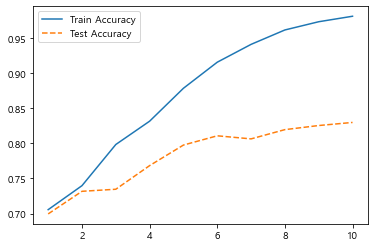

In [109]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [110]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 6
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,2,0.916,0.811
1,4,0.916,0.811
2,6,0.915,0.811
3,8,0.912,0.811
4,10,0.910,0.808
5,12,0.906,0.809
6,14,0.895,0.801
7,16,0.895,0.801
8,18,0.892,0.801
9,20,0.886,0.787


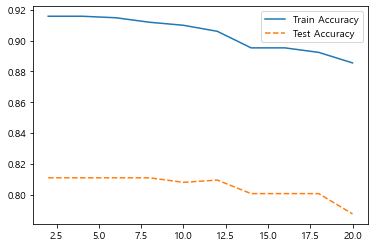

In [111]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [112]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = 6, min_samples_split=11
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,2,0.907,0.802
1,4,0.894,0.796
2,6,0.885,0.795
3,8,0.874,0.792
4,10,0.864,0.782
5,12,0.863,0.767
6,14,0.856,0.770
7,16,0.854,0.749
8,18,0.847,0.780
9,20,0.837,0.784


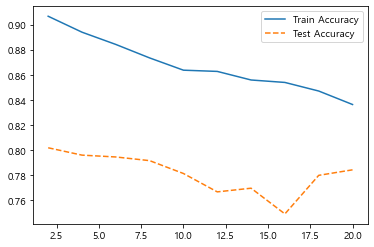

In [113]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

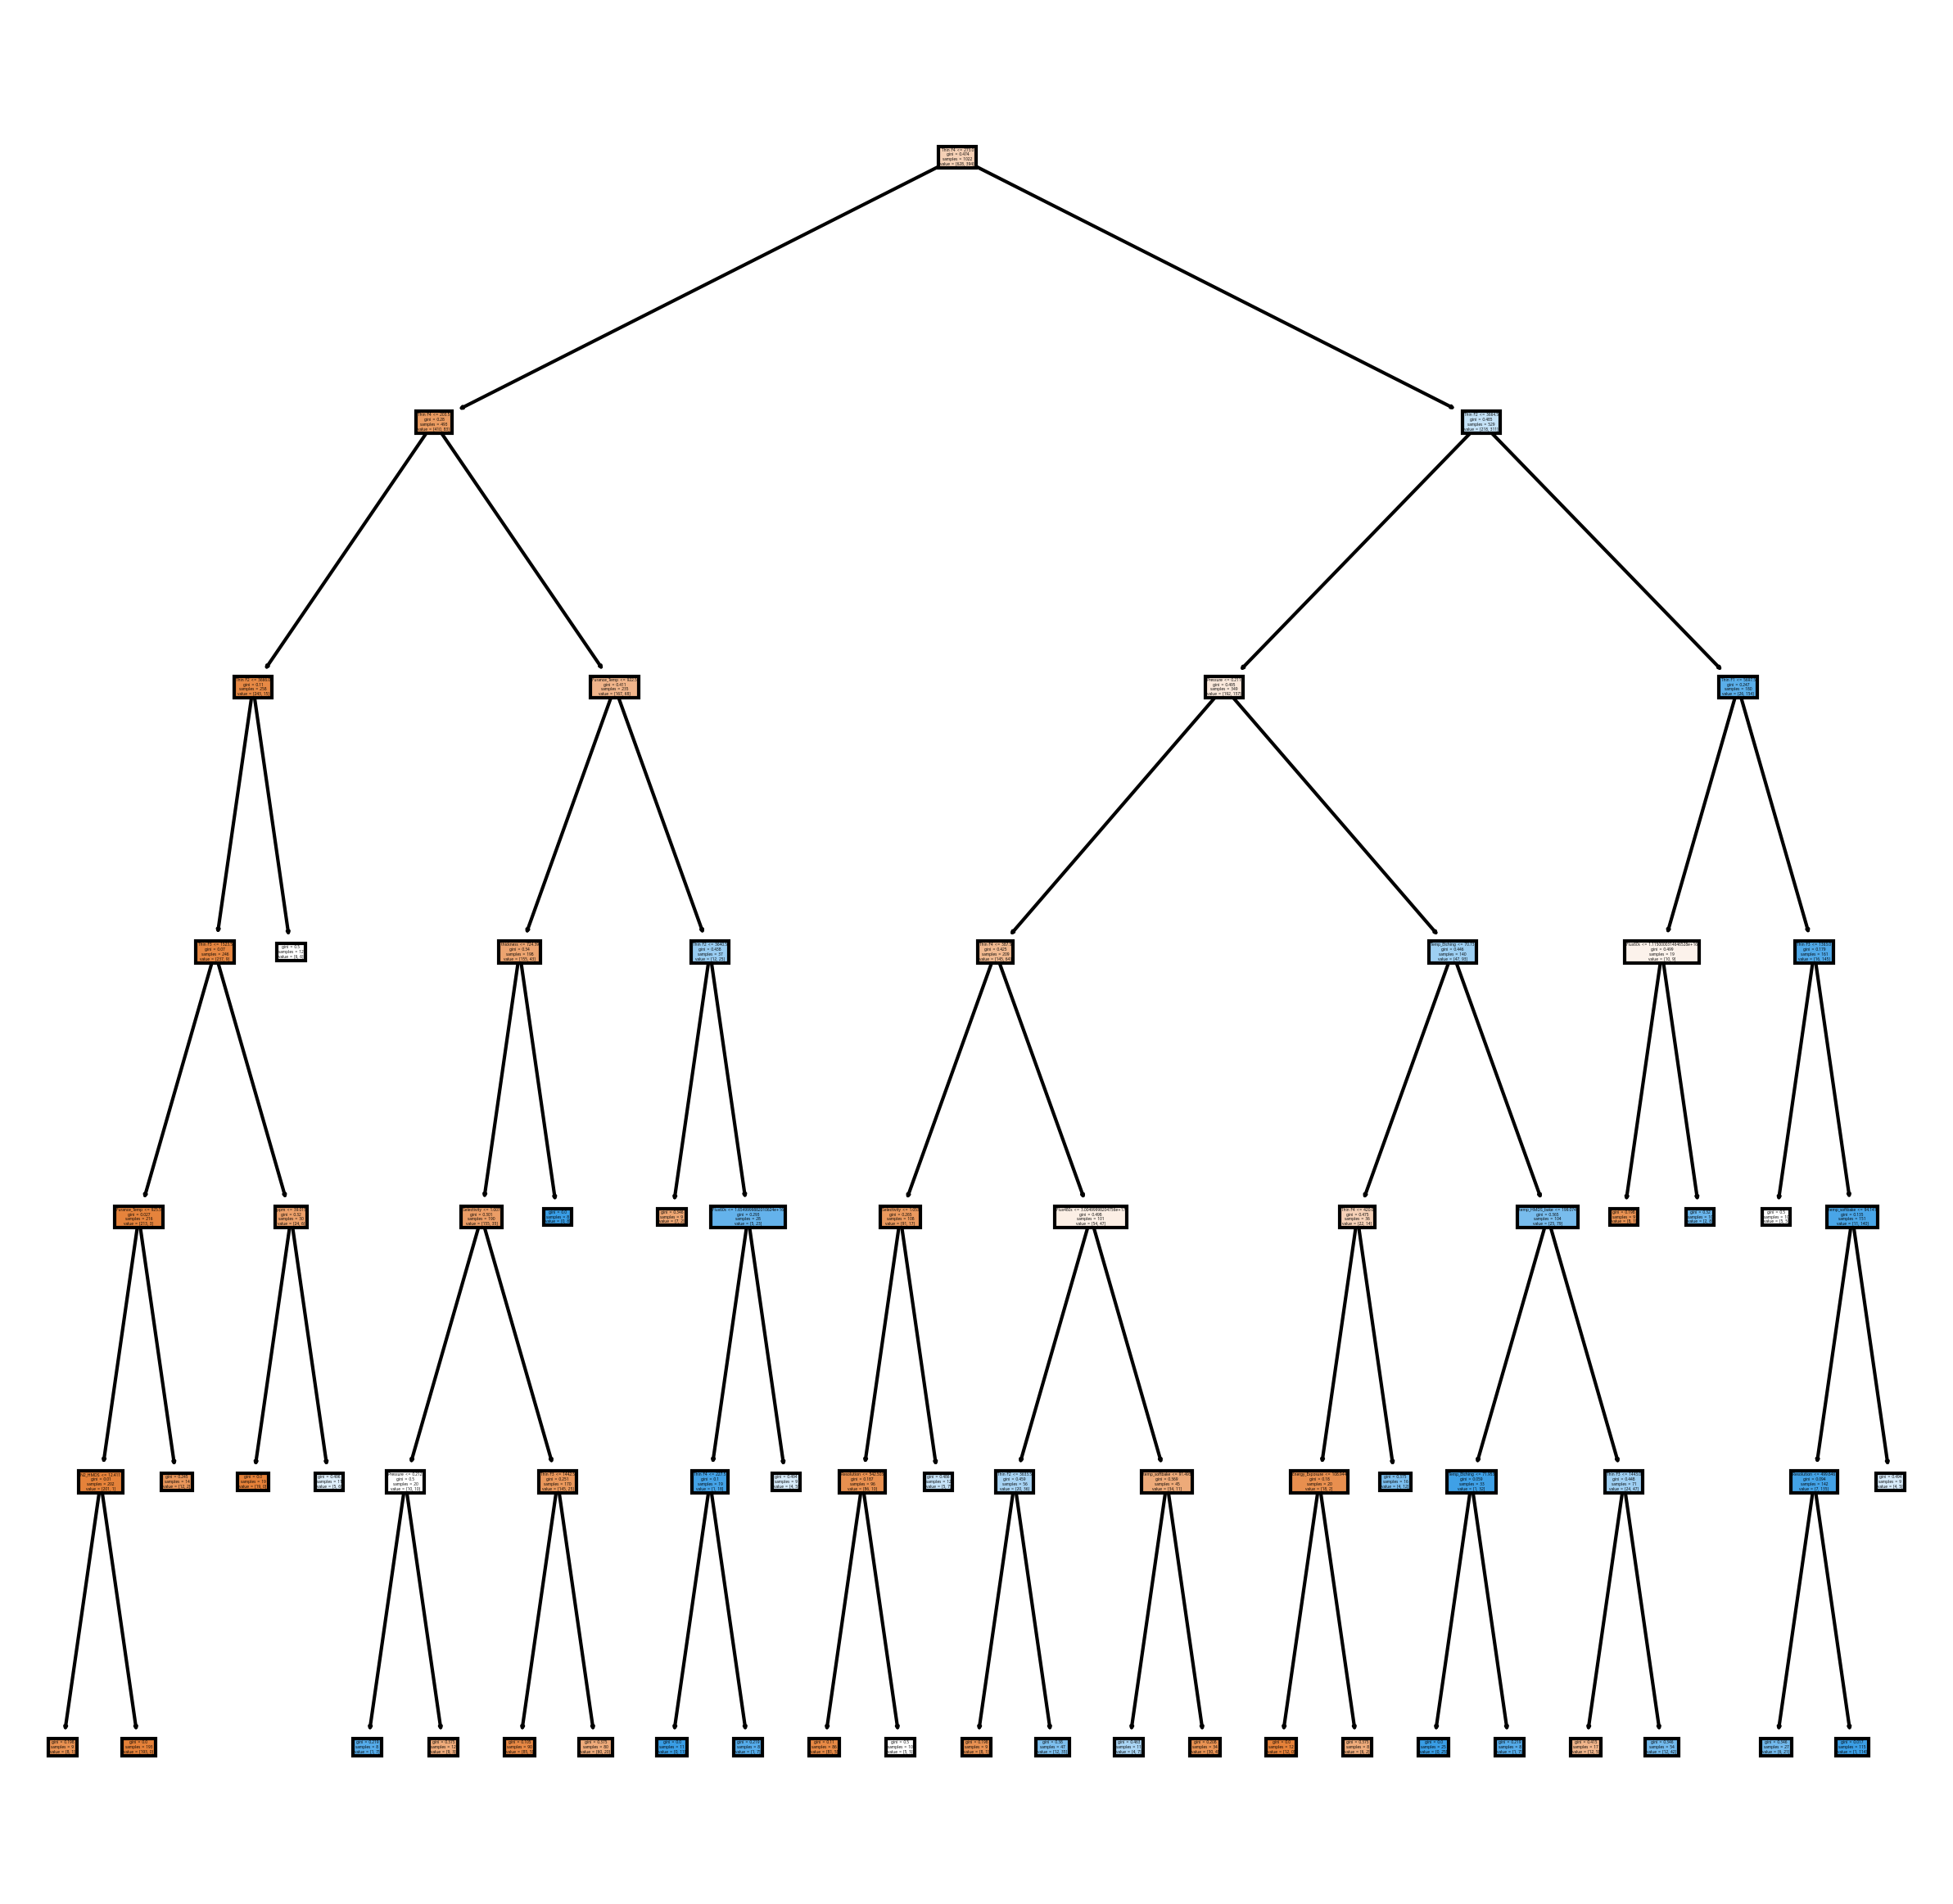

In [149]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeClassifier(min_samples_leaf = 8, min_samples_split = 18, max_depth = 6, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

In [150]:
y_pred = tree_final.predict(df_test_x)


print('Accuracy : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy : 0.792
Confusion matrix : 
[[354  65]
 [ 77 186]]
              precision    recall  f1-score   support

           0      0.821     0.845     0.833       419
           1      0.741     0.707     0.724       263

    accuracy                          0.792       682
   macro avg      0.781     0.776     0.778       682
weighted avg      0.790     0.792     0.791       682



In [151]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
21,Thin F4,0.404
23,Thin F2,0.184
2,Pressure,0.085
22,Thin F3,0.049
35,Furance_Temp,0.046
4,thickness,0.034
27,Selectivity,0.031
31,Flux480s,0.027
25,Temp_Etching,0.025
15,temp_softbake,0.024


Text(0, 0.5, '설명변수')

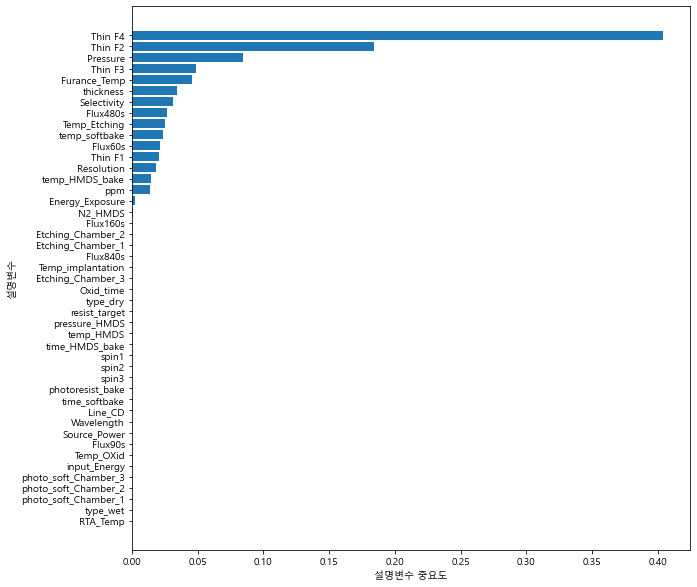

In [152]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# 랜덤 포레스트

In [120]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy ,# 설명변수
                                                                df_y, # 목표변수
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1022, 45)
train data Y size : (1022,)
test data X size : (682, 45)
test data Y size : (682,)


In [121]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.880


In [122]:
train_accuracy =[]
test_accuracy=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainScore'] = train_accuracy
df_accuracy_n['TestScore'] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.987,0.846
1,20,0.997,0.867
2,30,0.999,0.884
3,40,1.000,0.875
4,50,1.000,0.881
5,60,1.000,0.883
6,70,1.000,0.880
7,80,1.000,0.877
8,90,1.000,0.883
9,100,1.000,0.880


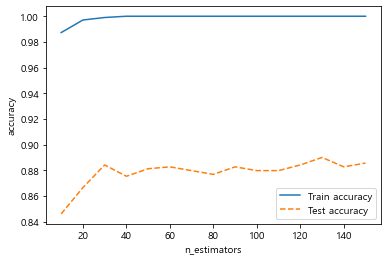

In [123]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [124]:
oob_error = []

for v_n_estimators in range(1, 151):
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators ,oob_score=True)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1- rf.oob_score_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used 

Text(0.5, 0, 'n_estimators')

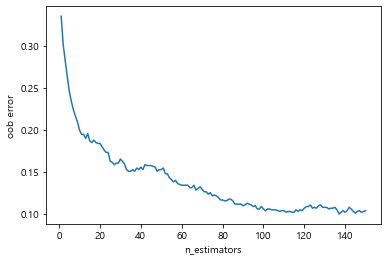

In [125]:
plt.plot(range(1, 151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

In [126]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, max_depth = v_max_depth,n_estimators = 130)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.650,0.651
1,2,0.749,0.733
2,3,0.809,0.771
3,4,0.852,0.793
4,5,0.906,0.833
5,6,0.945,0.853
6,7,0.965,0.859
7,8,0.978,0.865
8,9,0.992,0.862
9,10,0.997,0.872


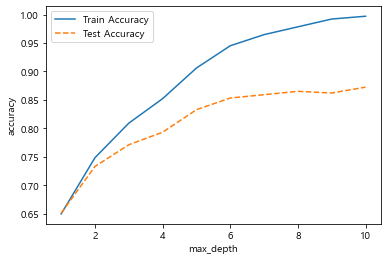

In [127]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

In [128]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234, max_depth = 5, n_estimators = 130
                                 , min_samples_split=v_min_samples_split )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,0.902,0.821
1,20,0.897,0.824
2,30,0.886,0.815
3,40,0.872,0.811
4,50,0.877,0.814
5,60,0.866,0.801
6,70,0.861,0.802
7,80,0.859,0.802
8,90,0.852,0.796
9,100,0.847,0.793


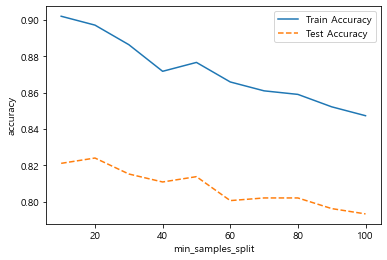

In [129]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_split')
plt.legend()

In [130]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, max_depth = 5, min_samples_split=50,n_estimators = 130
                                , min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,0.870,0.808
1,20,0.862,0.804
2,30,0.846,0.795
3,40,0.837,0.790
4,50,0.826,0.782
5,60,0.813,0.770
6,70,0.802,0.770
7,80,0.788,0.760
8,90,0.781,0.761
9,100,0.768,0.758


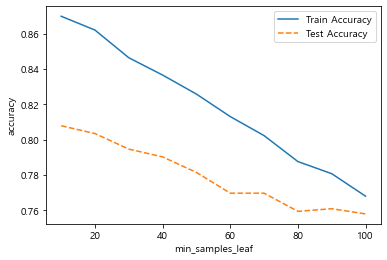

In [131]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()

In [153]:
rf_final = RandomForestClassifier(min_samples_leaf = 40, min_samples_split = 50, max_depth = 5, random_state=1234,
                                n_estimators =130)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.837
Accuracy on test set : 0.790
Confusion matrix : 
[[390  29]
 [114 149]]
              precision    recall  f1-score   support

           0      0.774     0.931     0.845       419
           1      0.837     0.567     0.676       263

    accuracy                          0.790       682
   macro avg      0.805     0.749     0.760       682
weighted avg      0.798     0.790     0.780       682



In [154]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
23,Thin F2,0.254
21,Thin F4,0.234
22,Thin F3,0.108
2,Pressure,0.044
4,thickness,0.032
25,Temp_Etching,0.030
27,Selectivity,0.030
20,Energy_Exposure,0.027
35,Furance_Temp,0.022
9,temp_HMDS_bake,0.018


Text(0, 0.5, '설명변수')

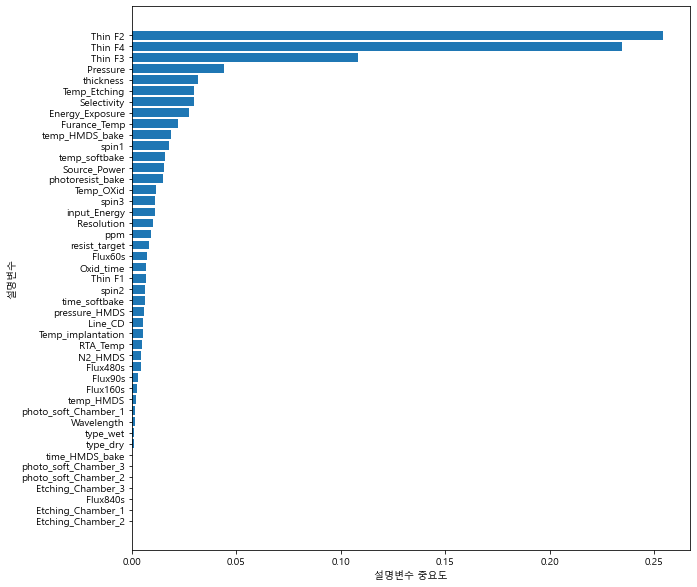

In [155]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# 그래디언트 부스팅

In [135]:
gb_uncustomized = GradientBoostingClassifier(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

# 과적합 발생

Accuracy on training set : 0.975
Accuracy on test set : 0.878


In [136]:
train_accuracy = [] 
test_accuracy = []
# 학습률 변경에 따른 모델 성능
para_lr = [lr*0.1 for lr in range(1, 11)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state=1234, learning_rate = v_learning_rate )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["Trainaccuracy"] = train_accuracy
df_accuracy_lr["Testaccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,LearningRate,Trainaccuracy,Testaccuracy
0,0.1,0.975,0.878
1,0.2,0.994,0.874
2,0.3,0.999,0.883
3,0.4,1.000,0.884
4,0.5,1.000,0.893
5,0.6,1.000,0.883
6,0.7,1.000,0.880
7,0.8,1.000,0.886
8,0.9,1.000,0.880
9,1.0,1.000,0.865


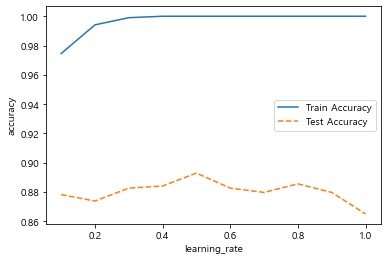

In [137]:
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('learning_rate')
plt.legend()

In [138]:
train_accuracy =[]
test_accuracy=[]
# 트리 수에 변경에 따른 모델 성능
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state = 1234,n_estimators =v_n_estimators, learning_rate = 0.5 )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainScore'] = train_accuracy
df_accuracy_n['TestScore'] = test_accuracy
df_accuracy_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.932,0.859
1,20,0.972,0.856
2,30,0.985,0.864
3,40,0.994,0.878
4,50,0.998,0.880
5,60,1.000,0.883
6,70,1.000,0.887
7,80,1.000,0.890
8,90,1.000,0.890
9,100,1.000,0.893


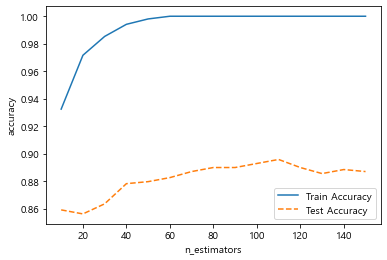

In [139]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()


In [140]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(random_state=1234, max_depth = v_max_depth,n_estimators = 130,learning_rate = 0.5)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.935,0.853
1,2,0.996,0.893
2,3,1.000,0.886
3,4,1.000,0.881
4,5,1.000,0.884
5,6,1.000,0.906
6,7,1.000,0.894
7,8,1.000,0.881
8,9,1.000,0.880
9,10,1.000,0.889


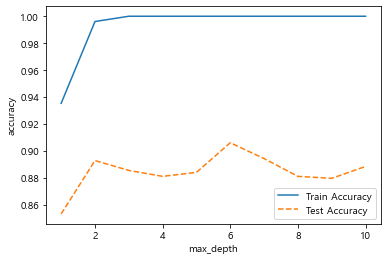

In [141]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

In [142]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234, max_depth = 6, n_estimators = 130,learning_rate = 0.5
                                 , min_samples_split=v_min_samples_split )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,1.0,0.891
1,20,1.0,0.890
2,30,1.0,0.890
3,40,1.0,0.877
4,50,1.0,0.878
5,60,1.0,0.884
6,70,1.0,0.880
7,80,1.0,0.872
8,90,1.0,0.877
9,100,1.0,0.883


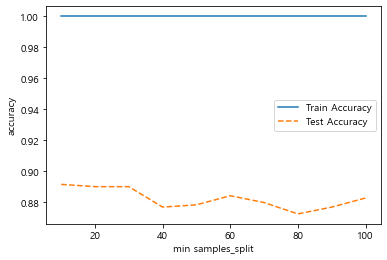

In [143]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min samples_split')
plt.legend()

In [144]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]
# 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능
for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state = 1234, max_depth = 6, min_samples_split=30,n_estimators = 130
                                , learning_rate = 0.5,min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,1.0,0.884
1,20,1.0,0.886
2,30,1.0,0.880
3,40,1.0,0.889
4,50,1.0,0.883
5,60,1.0,0.889
6,70,1.0,0.886
7,80,1.0,0.881
8,90,1.0,0.875
9,100,1.0,0.887


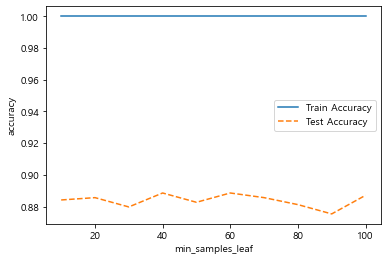

In [145]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()

In [156]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 60, min_samples_split = 30, max_depth = 6, random_state=1234,
                               learning_rate = 0.5, n_estimators =130)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 1.000
Accuracy on test set : 0.889
Confusion matrix : 
[[381  38]
 [ 38 225]]
              precision    recall  f1-score   support

           0      0.909     0.909     0.909       419
           1      0.856     0.856     0.856       263

    accuracy                          0.889       682
   macro avg      0.882     0.882     0.882       682
weighted avg      0.889     0.889     0.889       682



In [157]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
21,Thin F4,0.302
23,Thin F2,0.196
2,Pressure,0.077
22,Thin F3,0.062
35,Furance_Temp,0.036
33,input_Energy,0.027
4,thickness,0.026
27,Selectivity,0.026
19,Resolution,0.023
3,Oxid_time,0.020


Text(0, 0.5, '설명변수')

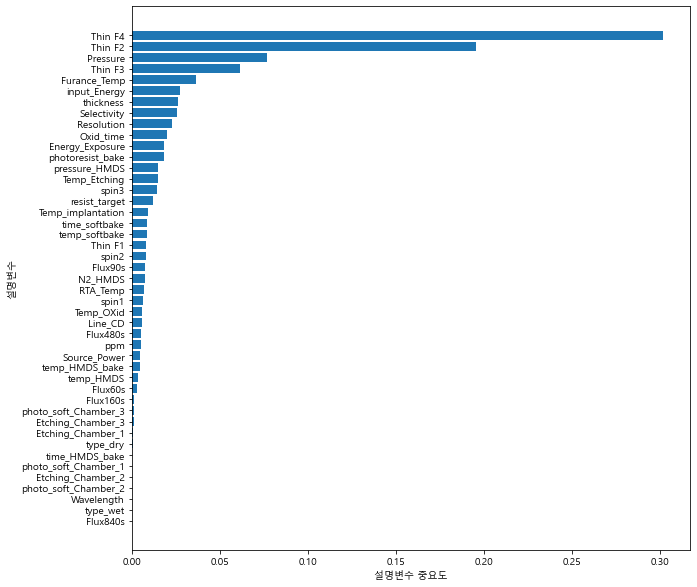

In [158]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")